# Data Science Pathways example workflow

This example shows you how to construct a simple linear regression in Python using the Boston Housing dataset. 

We want to know if the number of rooms in a house can be used to predict its median value in thousands of dollars.

### 0) load modules

First, load the required modules:

In [127]:
from datascience import Table
import numpy as np
from scipy import stats
import pandas as pd
import sklearn
import sklearn.datasets as DS
import matplotlib.pyplot as plt
%matplotlib inline

### 1) import data

Then, import the boston dataset from `sklearn.datasets` and check it out:

In [128]:
from sklearn.datasets import load_boston

boston_housing = DS.load_boston()

Check out the feature names to see what kind of dataset we are dealing with:

In [129]:
print(boston_housing.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Now, let's look at the help file to get a better description of the data: 

In [130]:
print(boston_housing['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Uh-oh, what happened here? `MEDV` is the value we want to predict, but it did not get included in the data importation. 

That's okay, we can add it to our `pandas` data frame!

In [131]:
boston = pd.DataFrame(
    np.column_stack([boston_housing.data, boston_housing.target]), 
    columns=np.r_[boston_housing.feature_names, ['MEDV']])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2) (an incredibly brief introduction to) simple linear regression

A linear regression model estimates the relationship between an independent variable and a dependent variable. 

__Independent variable (`RM`)__ is sometimes referred to as predictor or input variables.

__Dependent variable (`MEDV`)__ is also referred to as target, outcome, or response variables.

We can quickly get regression output via `stats.linregress` in `scipy`. 

In [132]:
stats.linregress(boston['RM'], boston['MEDV'])

LinregressResult(slope=9.1021089811803062, intercept=-34.67062077643854, rvalue=0.69535994707153903, pvalue=2.4872288710083768e-74, stderr=0.41902656012134054)

We can also define these values as variables for use in our plotting functions:

In [133]:
slope, intercept, r_value, p_value, std_err = stats.linregress(boston['RM'], boston['MEDV'])

Then, we can create a scatterplot of the number of rooms on the X axis, and median value on the Y axis. We can also use the slope and intercept estimates to plot a best fit line of the model. 

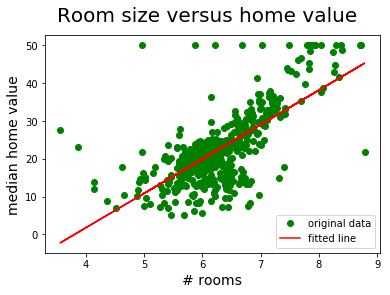

In [134]:
plt.plot(boston['RM'], boston['MEDV'], 'o', label='original data', color = "green")
plt.plot(boston['RM'], intercept + slope * boston['RM'], 'r', label='fitted line')

plt.suptitle('Room size versus home value', fontsize=20)
plt.xlabel('# rooms', fontsize=14)
plt.ylabel('median home value', fontsize=14)

plt.legend()
plt.show()

### 3) Conclusions

What do you think? Is the number of rooms in a house a good predictor of a home's median value for this particular dataset? 